In [1]:
import numpy as np
import h5py 
import os
# plotting
params = {
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 150,
    'axes.labelsize': 30,
    'axes.titlesize': 30,
    'font.size': 30,
    'legend.fontsize': 10,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': True,
    'font.family': 'serif',
}
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(params)
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
colors = [
    '#377eb8', '#ff7f00', '#4daf4a', 
    '#f781bf', '#a65628', '#984ea3', 
    '#999999', '#e41a1c', '#dede00',
    '#595959', '#5F9ED1', '#C85200',
    '#A2C8EC', '#FFBC79', '#CFCFCF'
]

In [3]:
correlations = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
thresholds = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [9]:
filename = 'data/test/test1.h5'
file = h5py.File(filename, 'r')

In [10]:
fn = file['fn'][:]
r2 = file['r2'][:]
r2_true = file['r2_true'][:]

# False Negatives vs. Threshold

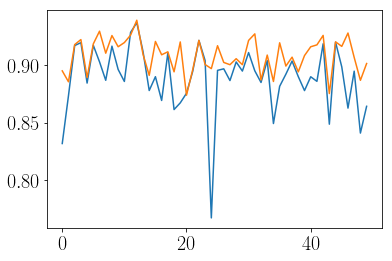

In [11]:
plt.plot(r2)
plt.plot(r2_true)
plt.show()

In [12]:
filename = 'data/test/test3.h5'
file = h5py.File(filename, 'r')

In [13]:
fn = file['fn'][:]
r2 = file['r2'][:]
r2_true = file['r2_true'][:]

In [15]:
# Average across trials
fn_avg = np.mean(fn, axis=0)
r2_avg = np.mean(r2, axis=0)
r2_true_avg = np.mean(r2_true)

In [22]:
betas = file['beta'][:]
beta_hats = file['beta_hats'][:]

In [36]:
beta_hats[1, 5, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

No handles with labels found to put in legend.


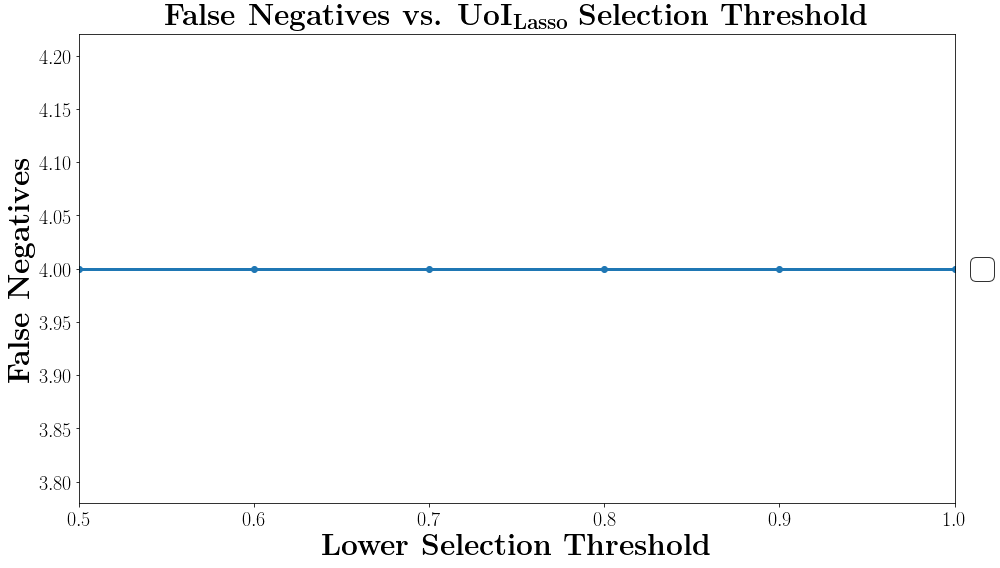

In [16]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.errorbar(thresholds, fn_avg, linewidth=3, marker='o')
ax.set_xlim([0.5, 1.0])
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 30})
lgd.get_frame().set_edgecolor('k')
ax.set_xlabel(r'\textbf{Lower Selection Threshold}')
ax.set_ylabel(r'\textbf{False Negatives}')
ax.set_title(r'\textbf{False Negatives vs. UoI}$_{\mathbf{Lasso}}$ \textbf{Selection Threshold}')
plt.tight_layout()
#plt.savefig('fn_vs_lower_threshold.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

# $R^2$ vs. Threshold

In [14]:
r2_avg = np.median(r2, axis=0)
r2_std = np.std(r2, axis=0)
r2_med_true = np.median(r2_true, axis=0)

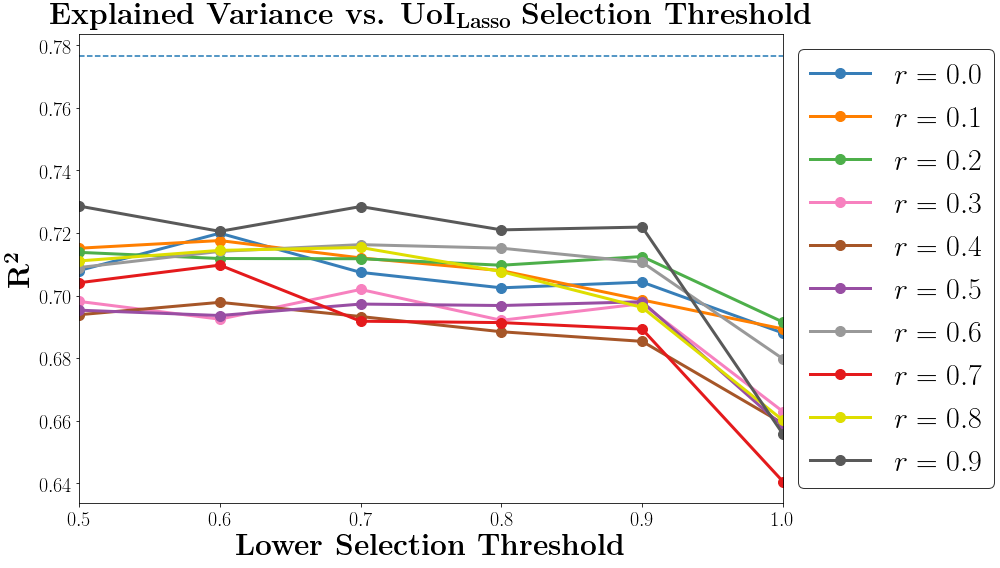

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))
[ax.errorbar(thresholds, r2_avg[idx, :], linewidth=3, marker='o', color=colors[idx], markersize=10, label=r'$r=%0.1f$' %corr) for idx, corr in enumerate(0.1 * np.arange(10))]
ax.plot(thresholds, r2_med_true[0, :], '--')
ax.set_xlim([0.5, 1.0])
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 30})
lgd.get_frame().set_edgecolor('k')
ax.set_xlabel(r'\textbf{Lower Selection Threshold}')
ax.set_ylabel(r'$\mathbf{R^2}$')
ax.set_title(r'\textbf{Explained Variance vs. UoI}$_{\mathbf{Lasso}}$ \textbf{Selection Threshold}')
plt.tight_layout()
plt.savefig('r2_vs_lower_threshold.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [14]:
s = 'results.h5'
s.split('.h5')[0]

'results'

In [15]:
uicorr

NameError: name 'uicorr' is not defined

In [16]:
uoicorr

NameError: name 'uoicorr' is not defined

# Is there a problem with the selection_threshold_min module?

In [12]:
filename = 'data/test/test6.h5'
file = h5py.File(filename, 'r')

In [13]:
fn = file['fn'][:]
r2 = file['r2'][:]
r2_true = file['r2_true'][:]

In [14]:
r2_true

array([0.88279029, 0.89070196, 0.89997411, 0.94565812, 0.91222315,
       0.85775374, 0.91783735, 0.88294621, 0.91329887, 0.85486611,
       0.90173225, 0.89301725, 0.88811792, 0.88046364, 0.91110793,
       0.89828741, 0.86783249, 0.91541305, 0.90585337, 0.92201608,
       0.88795138, 0.91034977, 0.90618889, 0.91167322, 0.90039247])

In [17]:
r2.shape

(25, 2)

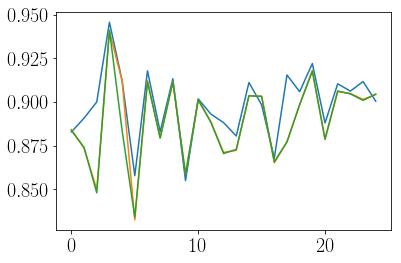

In [18]:
plt.plot(r2_true)
plt.plot(r2[:, 0])
plt.plot(r2[:, 1])
plt.show()

In [36]:
# Quick test to see if there is a runtime difference between specifying the lower selection threshold and not. Does uoicorr_block
# output garbage?
filename = 'results.h5'
file = h5py.File(filename, 'r')

In [37]:
fn = file['fn'][:]
r2 = file['r2'][:]
r2_true = file['r2_true'][:]

In [24]:
fn.shape

(1, 4, 2)

In [38]:
fn

array([[[25., 24.],
        [23., 24.],
        [22., 22.],
        [21., 23.]]])

In [39]:
file.close()